## ESMA 4016
## Simple Linear Regression using Tensorflow
## Edgar Acuna
### March 2021

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
print(tf.__version__)

2.4.1


In [3]:
#Entering the data
x=[3.0,4.0,6.0,7.0,8.0,12.0,15.0,20.0,22.0,26.0]
y=[9,12,16,19,23,27,34,37,40,45]
x=np.asarray(x)
y=np.asarray(y)
n=len(x)
x.shape

(10,)

In [4]:
#Randon seeed for reproducibility 
np.random.seed(101) 
tf.compat.v1.set_random_seed(101) 

In [5]:
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder("float") 
Y = tf.compat.v1.placeholder("float") 

In [6]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b")
#W = tf.Variable([4.0], name = "W") 
b= tf.Variable([10.0], name = "b")

In [7]:
#  
y_pred = tf.add(tf.multiply(X, W), b) 

In [8]:
learning_rate = 0.001
training_epochs = 12000

In [9]:
# Mean Squared Error Cost Function in the standard form
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2))/n

In [10]:
# Gradient Descent Optimizer 
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

In [11]:
# Global Variables Initializer 
init = tf.compat.v1.global_variables_initializer() 

In [12]:
# Starting the Tensorflow Session 
with tf.compat.v1.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.865315 W = 1.3761863 b = [9.858536]
Epoch 100 : cost = 5.7946625 W = 1.3793938 b = [9.800285]
Epoch 150 : cost = 5.727818 W = 1.3825117 b = [9.743658]
Epoch 200 : cost = 5.6645775 W = 1.3855431 b = [9.688607]
Epoch 250 : cost = 5.6047416 W = 1.38849 b = [9.635091]
Epoch 300 : cost = 5.5481315 W = 1.3913546 b = [9.583066]
Epoch 350 : cost = 5.494565 W = 1.3941394 b = [9.532492]
Epoch 400 : cost = 5.443879 W = 1.3968465 b = [9.483325]
Epoch 450 : cost = 5.395923 W = 1.3994778 b = [9.4355345]
Epoch 500 : cost = 5.35054 W = 1.4020364 b = [9.389072]
Epoch 550 : cost = 5.307595 W = 1.4045233 b = [9.343906]
Epoch 600 : cost = 5.26695 W = 1.406941 b = [9.299995]
Epoch 650 : cost = 5.2284827 W = 1.4092916 b = [9.257306]
Epoch 700 : cost = 5.1920757 W = 1.4115767 b = [9.215807]
Epoch 750 : cost = 5.157617 W = 1.413798 b = [9.175463]
Epoch 800 : cost = 5.1250005 W = 1.4159579 b = [9.136239]
Epoch 850 : cost = 5.094129 W = 1.4180572 b = [9.098115]
Epoch 900 : cost = 5.0649023 W

Epoch 7100 : cost = 4.5344977 W = 1.4891652 b = [7.806709]
Epoch 7150 : cost = 4.5344257 W = 1.4892244 b = [7.805636]
Epoch 7200 : cost = 4.534355 W = 1.4892827 b = [7.8045735]
Epoch 7250 : cost = 4.5342875 W = 1.4893377 b = [7.8035808]
Epoch 7300 : cost = 4.5342245 W = 1.4893925 b = [7.802584]
Epoch 7350 : cost = 4.53416 W = 1.4894459 b = [7.8016133]
Epoch 7400 : cost = 4.534096 W = 1.4894986 b = [7.800658]
Epoch 7450 : cost = 4.534039 W = 1.4895498 b = [7.799727]
Epoch 7500 : cost = 4.5339823 W = 1.4896007 b = [7.7988]
Epoch 7550 : cost = 4.533925 W = 1.4896489 b = [7.797927]
Epoch 7600 : cost = 4.53387 W = 1.4896963 b = [7.7970686]
Epoch 7650 : cost = 4.5338206 W = 1.4897419 b = [7.7962365]
Epoch 7700 : cost = 4.5337687 W = 1.4897852 b = [7.7954516]
Epoch 7750 : cost = 4.5337253 W = 1.489826 b = [7.7947164]
Epoch 7800 : cost = 4.5336814 W = 1.4898653 b = [7.794001]
Epoch 7850 : cost = 4.5336394 W = 1.4899051 b = [7.7932725]
Epoch 7900 : cost = 4.533596 W = 1.4899435 b = [7.7925787]


In [13]:
# Calculating the predictions 
predictions = weight*x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

Training cost = 4.5324297 Weight = 1.4911404 bias = [7.7708435] 



In [14]:
print(predictions)

[12.2442646  13.73540497 16.7176857  18.20882607 19.69996643 25.66452789
 30.13794899 37.59365082 40.57593155 46.54049301]


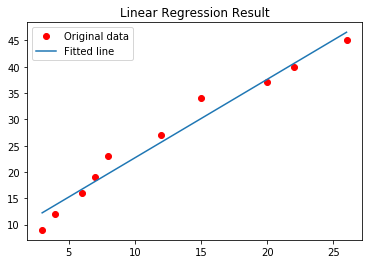

In [15]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 